<a href="https://colab.research.google.com/github/PaulASeward/MachineLearning/blob/main/Exploring_Datasets_with_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploring the scikit wine datasets**







In [6]:
from sklearn.datasets import load_wine 
# Imports the wine constructor.
wine = load_wine()

print(type(wine))
print(type(wine.data))
print(type(wine.target))
print(wine.data.shape)
print(wine.feature_names)
print(wine.target_names)
print(wine.target)


<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Next, the actual data as an array can be explored along with the target values.

In [5]:
print(wine.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


This is not suer-friendly yet, so lets try using pandas to explore this dataset as a pandas dataframe.

In [11]:
import pandas as pd
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = pd.Series(wine.target)

print(wine_df)
wine_df.head()

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Ahhh much better.

In [13]:
print(wine.target)
print(wine_df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


In [15]:
# Create X (features) and y(target attribute)
X = wine.data
y= wine.target

# Import the KNN class
from sklearn.neighbors import KNeighborsClassifier
k=10
knn = KNeighborsClassifier(n_neighbors=k)

# Split the data before training and testing a model
from sklearn.model_selection import train_test_split

# This function splits each data inputted. X -> X_train, X_test following the test size split,
# Here we have 40% test data, so 60% training data following randome state of 4 for repeatability.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.4, random_state =4)

# Verify the numbers split. Recall we used 177 samples. X should still keep 13 features with y having just a single target.
print(X_train.shape)
print(y_test.shape)

(106, 13)
(72,)


In [18]:
# Now we can use our training data for the model to train with.
knn.fit(X_train, y_train)
# The model is trained and can now use test data for prediction.
y_pred = knn.predict(X_test)
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the KNN predictor with k=" + str(k) + ": " + str(accuracy))


Accuracy of the KNN predictor with k=10: 0.7222222222222222


This was great for just one selection of K but lets see a list of what other options might be more optimal in terms of accuracy.

In [30]:
k_range = range(1,26)
scores = []

# Lets loop through k_range creating a new score for each k value.
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_pred,y_test))

print(scores)

# Finding the maximum accuracy.
max_acc = max(scores)
print(max_acc)

[0.7361111111111112, 0.7083333333333334, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.75, 0.7777777777777778, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7361111111111112, 0.7361111111111112, 0.75, 0.7222222222222222, 0.7361111111111112, 0.7361111111111112, 0.7361111111111112, 0.7361111111111112, 0.75, 0.7638888888888888, 0.75, 0.7638888888888888, 0.75, 0.75]
0.7777777777777778


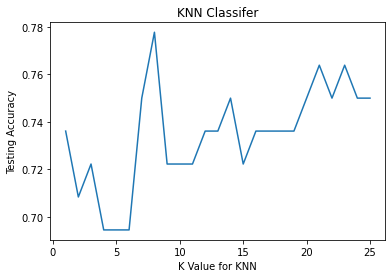

In [37]:
# Lets plot these accuracies along an x-axis, k value.
import matplotlib.pyplot as plt


plt.plot(k_range, scores)
plt.xlabel("K Value for KNN")
plt.ylabel("Testing Accuracy")
plt.title("KNN Classifer")
plt.show()


